In [2]:
#load packages
import pandas  as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns

In [3]:
#import dataset
bigmart_df = pd.read_csv('bigmart-train.csv')

In [4]:
bigmart_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [5]:
bigmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**inspect variable with null value**

In [6]:
#inspect item_weight
bigmart_df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

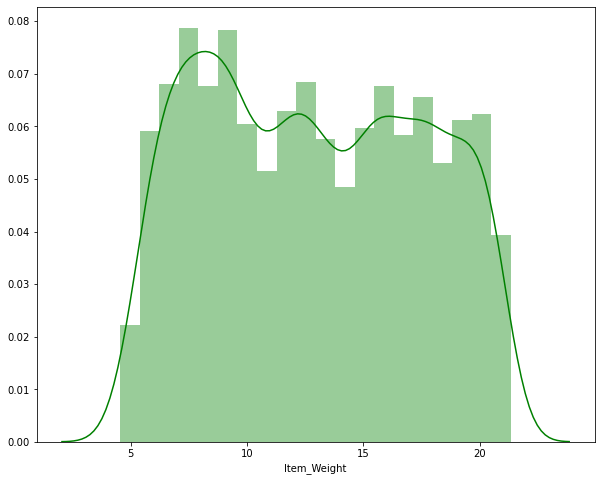

In [7]:
plt.figure(figsize=(10,8))
sns.distplot(bigmart_df['Item_Weight'], color='green')

In [8]:
#impute variable item_weight with mean
bigmart_df['Item_Weight'].fillna(bigmart_df['Item_Weight'].mean(), inplace=True)

In [9]:
#inspect variable Outlet Size

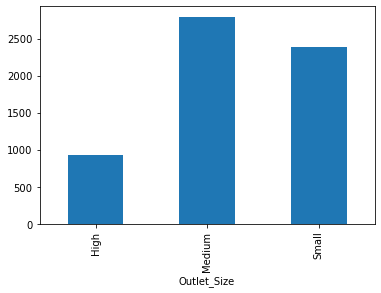

In [10]:
bigmart_df.groupby('Outlet_Size').count()['Item_Identifier'].plot(kind='bar')

In [11]:
bigmart_df['Outlet_Size'].fillna(bigmart_df['Outlet_Size'].mode()[0], inplace=True)

In [12]:
#Take only object type
bigmart_df.select_dtypes(['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## Exploratory Data Analysis

questions :
1. Bagaimana sebaran datanya?
2. Manakah yang lebih laris produk low fat atau bukan?
3. Apakah visibility berkorelasi dengan sales?
4. Outlet yang punya penjualan terbanyak?
5. Apakah penjualan berkorelasi dengan tahun?
6. Sebaran tahun bagaimana?
7. Bagaimana sebarannya dan apakah berkorelasi degan penjualan
8. Korelasi antara sebaran dan tahun berdiri
9. Jumlah produk terjual dari tahun ke tahun
10. Jumlah produk yang laku di outlet-outlet tertentu

## Sebaran Data

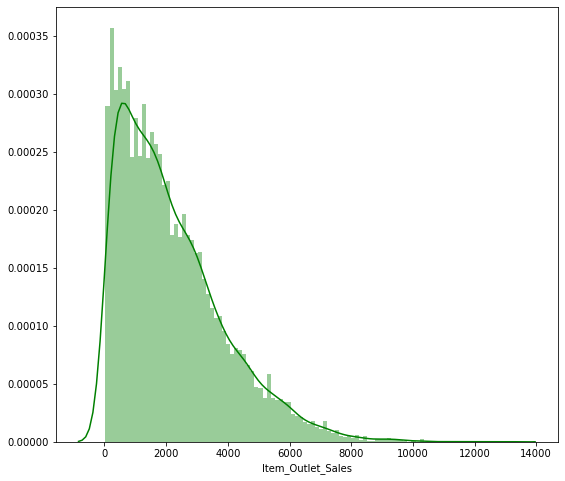

In [13]:
#sebaran data variable target
plt.figure(figsize=(9,8))
sns.distplot(bigmart_df['Item_Outlet_Sales'] ,color='g', bins=100,hist_kws = {'alpha':0.4})

In [14]:
bigmart_df['Item_Outlet_Sales'].skew()

1.1775306028542798

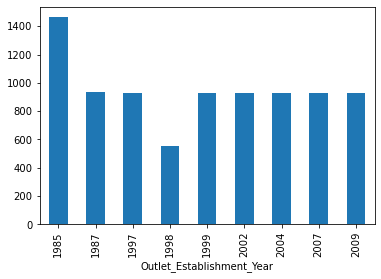

In [15]:
##Jumlah outlet dari total penjualan per tahun
bigmart_df.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].count().plot(kind='bar')

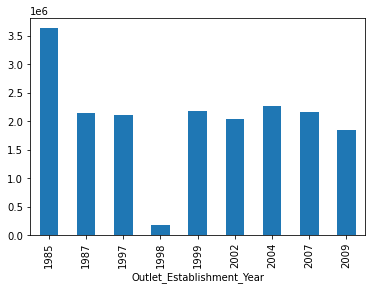

In [16]:
#total sales per tahun
bigmart_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().plot(kind='bar')

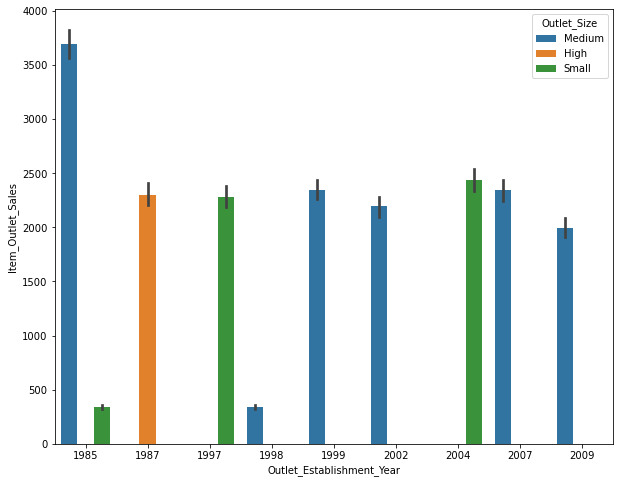

In [17]:
#Penjualan per tahun berdasarkan outlet size
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Outlet_Establishment_Year', y ='Item_Outlet_Sales', hue='Outlet_Size', data = bigmart_df, )
plt.show()

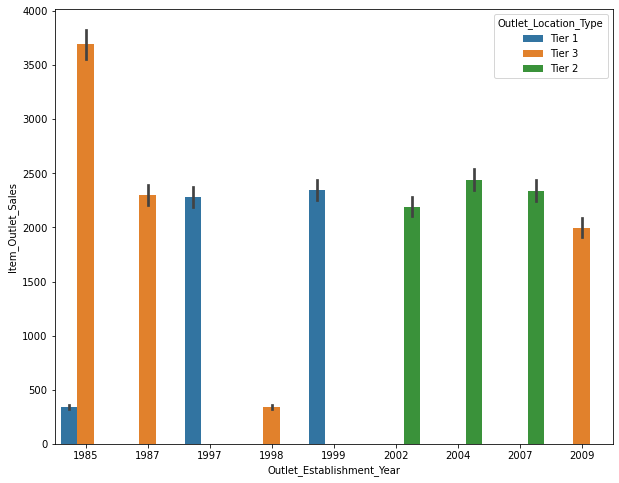

In [18]:
#Penjualan per tahun berdasarkan outlet location
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Outlet_Establishment_Year', y ='Item_Outlet_Sales', hue='Outlet_Location_Type', data = bigmart_df, )
plt.show()

In [19]:
## Komparasi penjualan produk lowfat dan non lowfat

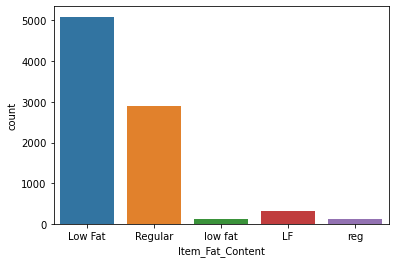

In [20]:
sns.countplot(bigmart_df['Item_Fat_Content'])

In [21]:
fat_content = []
for f in bigmart_df['Item_Fat_Content']:
    if ((f == "LF") | (f == "low fat") | (f == "Low Fat")):
        fat_content.append("Low Fat")
    else:
        fat_content.append("Regular")

In [22]:
bigmart_df['Item_Fat_Content'] = fat_content

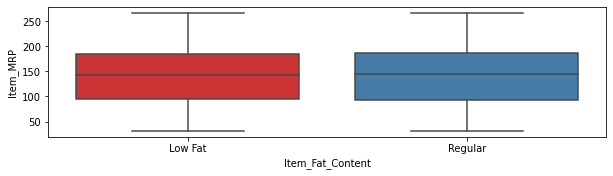

In [23]:
#komparasi harga lowfat dan reguler

plt.figure(figsize=(10,5))
plt.subplot(311)
ax = sns.boxplot(x='Item_Fat_Content', y = 'Item_MRP', data = bigmart_df, palette='Set1')
plt.subplots_adjust(wspace=0.2, hspace=0.4, top = 1.5)

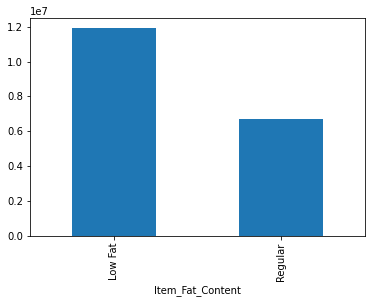

In [24]:
bigmart_df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum().plot(kind='bar')

**Total penjualan Lowfat lebih tinggi dibandingkan dengan produk Regular**

## Korelasi antara visibility dan Sales

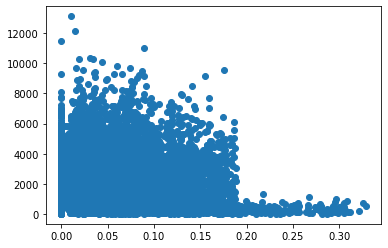

In [25]:
plt.scatter(x='Item_Visibility', y = 'Item_Outlet_Sales', data=bigmart_df)

{'whiskers': [<matplotlib.lines.Line2D at 0x183d9d68c08>,
 'caps': [<matplotlib.lines.Line2D at 0x183d9d6da48>,
 'boxes': [<matplotlib.lines.Line2D at 0x183d9d68a48>],
 'medians': [<matplotlib.lines.Line2D at 0x183d9d73e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x183d9d73f88>],
 'means': []}

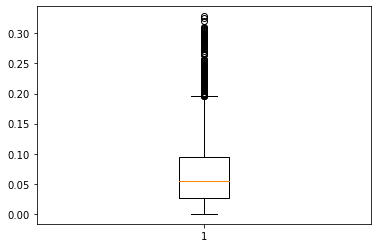

In [26]:
plt.boxplot(x=bigmart_df['Item_Visibility'])

In [27]:
missing_values = (bigmart_df['Item_Visibility'] == 0)
visibility_avg = bigmart_df.pivot_table(values='Item_Visibility', index='Item_Identifier')
bigmart_df.loc[missing_values,'Item_Visibility'] = bigmart_df.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

In [28]:
bigmart_df['Item_Identifier2'] = [x[:2] for x in bigmart_df['Item_Identifier']]

In [29]:
bigmart_df.rename({'Item_Identifier2':'Item_Code'}, axis=1, inplace=True)

In [30]:
bigmart_df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

## Feature engineering

In [31]:
#scaling
from sklearn.preprocessing import scale

In [32]:
bigmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Code                  8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

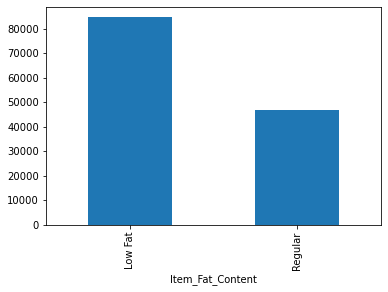

In [33]:
qty = []
for i, r in bigmart_df.iterrows():
    x = round(bigmart_df['Item_Outlet_Sales'][i] / bigmart_df['Item_MRP'][i], 1)
    qty.append(x)
bigmart_df['qty'] = qty
bigmart_df.groupby('Item_Fat_Content')['qty'].sum().plot(kind='bar')

In [34]:
#Back up dataset
bigmart_df2 = bigmart_df

In [35]:
bigmart_df['Item_Weight'] = scale(bigmart_df['Item_Weight'])
bigmart_df['Item_Visibility'] = scale(bigmart_df['Item_Visibility'])
bigmart_df['Item_MRP'] = scale(bigmart_df['Item_MRP'])
bigmart_df['Item_Outlet_Sales'] = scale(bigmart_df['Item_Outlet_Sales'])
bigmart_df['qty'] = scale(bigmart_df['qty'])

In [36]:
lbl = LabelEncoder()
bigmart_df['Item_Identifier'] = lbl.fit_transform(bigmart_df['Item_Identifier'] )
bigmart_df['Item_Fat_Content'] = lbl.fit_transform(bigmart_df['Item_Fat_Content'] )
bigmart_df['Item_Type'] = lbl.fit_transform(bigmart_df['Item_Type'] )
bigmart_df['Outlet_Identifier'] = lbl.fit_transform(bigmart_df['Outlet_Identifier'] )
bigmart_df['Outlet_Size'] = lbl.fit_transform(bigmart_df['Outlet_Size'] )
bigmart_df['Outlet_Location_Type'] = lbl.fit_transform(bigmart_df['Outlet_Location_Type'])
bigmart_df['Outlet_Type'] = lbl.fit_transform(bigmart_df['Outlet_Type'])
bigmart_df['Item_Code'] = lbl.fit_transform(bigmart_df['Item_Code'])

## Feature Correlation

In [37]:
bigmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Code                  8523 non-null   int32  
 13  qty                        8523 non-null   float

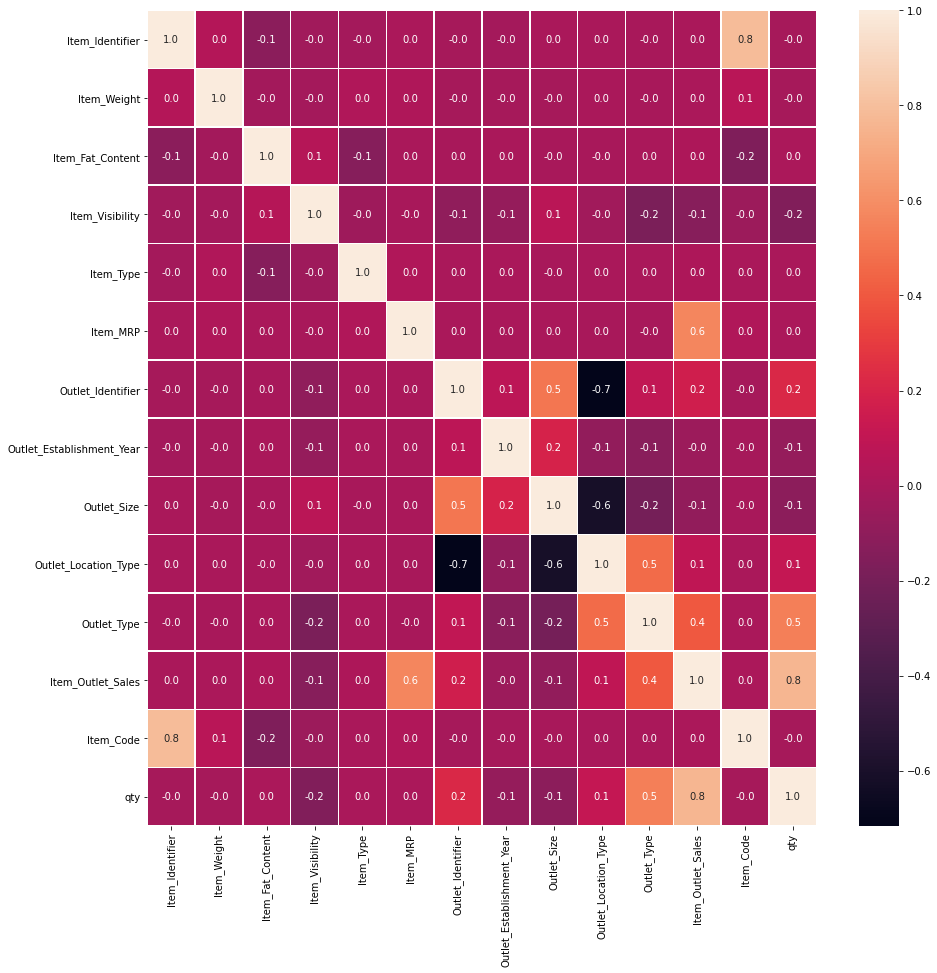

In [38]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(bigmart_df.corr(), annot=True,linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

### Feature Importance

In [39]:
X = bigmart_df.drop(['Item_Outlet_Sales'],axis=1)
y = bigmart_df['Item_Outlet_Sales']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [41]:
model = LinearRegression()

In [42]:
#lr = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
importance = model.coef_

In [44]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00001
Feature: 1, Score: 0.00479
Feature: 2, Score: 0.00825
Feature: 3, Score: -0.00758
Feature: 4, Score: -0.00127
Feature: 5, Score: 0.55931
Feature: 6, Score: -0.00175
Feature: 7, Score: 0.00056
Feature: 8, Score: -0.00967
Feature: 9, Score: -0.00350
Feature: 10, Score: -0.00392
Feature: 11, Score: -0.01286
Feature: 12, Score: 0.75469


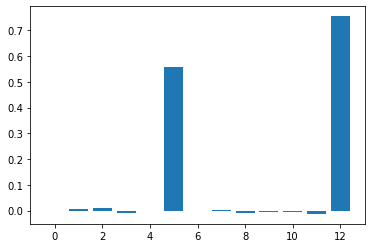

In [45]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Modelling

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = model.predict(X_test)

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.21610989949709372
Mean Squared Error: 0.10065177120620585
Root Mean Squared Error: 0.3172566330373659


In [50]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_result = df_result.head(25)

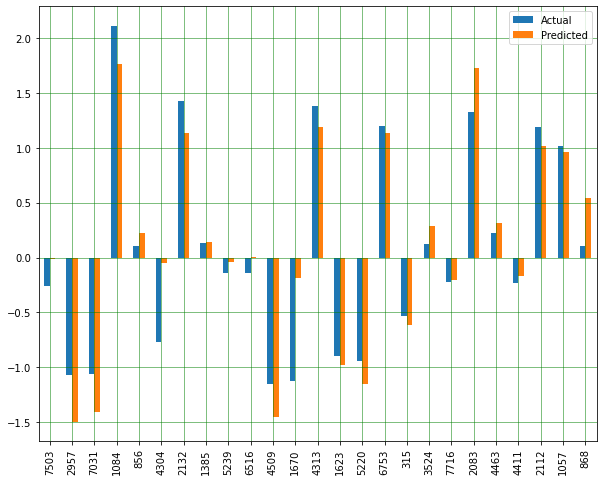

In [51]:
df_result.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [52]:
df_result

,Actual,Predicted
7503,-0.256812,-0.008963
2957,-1.069164,-1.493973
7031,-1.057068,-1.404713
1084,2.108058,1.759728
856,0.102932,0.224316
4304,-0.771067,-0.053291
2132,1.425636,1.131761
1385,0.134536,0.139802
5239,-0.136637,-0.037992
6516,-0.142880,0.008752


## Gradient Descent

In [53]:
from sklearn import preprocessing

In [54]:
cols = bigmart_df2.columns

In [55]:
for col in cols:
    bigmart_df2[col] = preprocessing.scale(bigmart_df2[col])

In [56]:
X = bigmart_df2.drop(['Item_Outlet_Sales'],axis=1).to_numpy()
X = np.c_[np.ones(bigmart_df2.shape[0]),X]
X.shape

(8523, 14)

In [57]:
type(X)

numpy.ndarray

In [58]:
## Gradient descent

alpha = 0.001 #learning rate
iters = 1000
m = y.size
np.random.seed(10)
theta = np.random.rand(14)

In [59]:
bigmart_df2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Code', 'qty'],
      dtype='object')

In [60]:
len(theta)

14

In [61]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []
    theta_list = []
    prediction_list = []
    run = True
    cost_list.append(1e10)
    i = 0
    while run:
        prediction = np.dot(x, theta)
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error) #cost function
        cost_list.append(cost)
        theta = theta - (alpha *(1/m) * np.dot(x.T,error)) #re-define theta/weight
        theta_list.append(theta)
        
        if cost_list[i] - cost_list[i+1] < 1e-9:
            run = False
        
        i +=1
    cost_list.pop(0)
    return prediction_list,cost_list,theta_list
        

In [62]:
prediction_list, cost_list, theta_list = gradient_descent(X, y, m, theta, alpha)

In [63]:
theta = theta_list[-1]

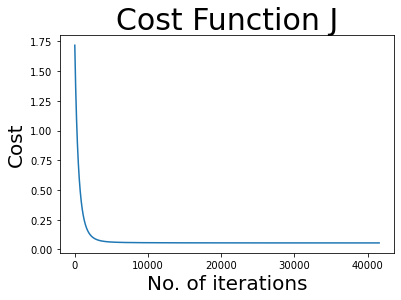

In [64]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [65]:
theta = theta_list[-1]
theta

array([-7.18306069e-17,  5.78768919e-03,  4.81537606e-03,  3.95762954e-03,
       -7.63461480e-03, -5.38206520e-03,  5.59263799e-01,  1.04783649e-03,
        4.10194350e-03, -4.74753476e-03,  4.94951760e-03, -7.93069846e-03,
       -6.74039810e-03,  7.55170912e-01])

In [66]:
yp = theta[0] +theta[1]*X[:,1] + theta[2]*X[:,2]

In [67]:
MSE_equ = ((yp-y)**2).mean()  #Using yp from equation of hyperplane

In [68]:
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent


In [69]:
print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 1.0
Mean Square Error from Gradient Descent prediction : 0.111
